In [1]:
import os
os.chdir('../')

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import pearsonr

from src.utils import set_size_and_get_figsize

/tmp/ipykernel_542/2951688260.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Discount factor vs. final episodic return
r=-0.32, p=0.1083


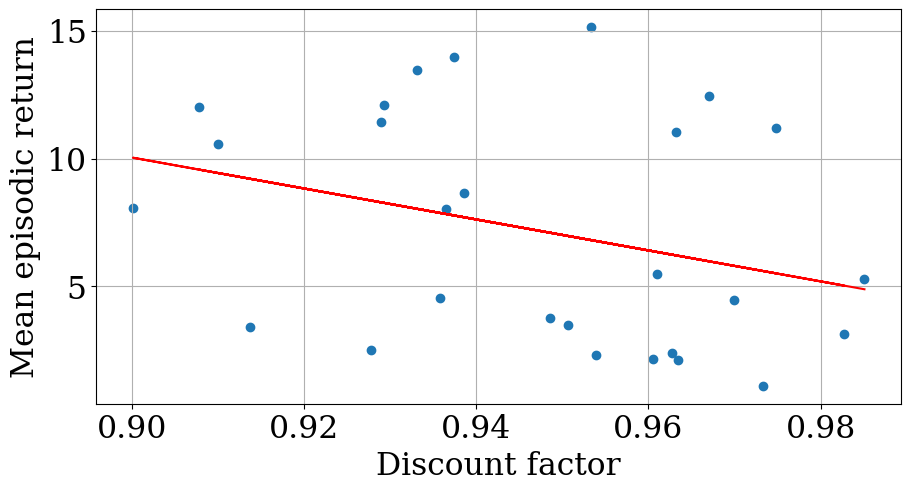

Tau vs. final episodic return
r=-0.12, p=0.5352


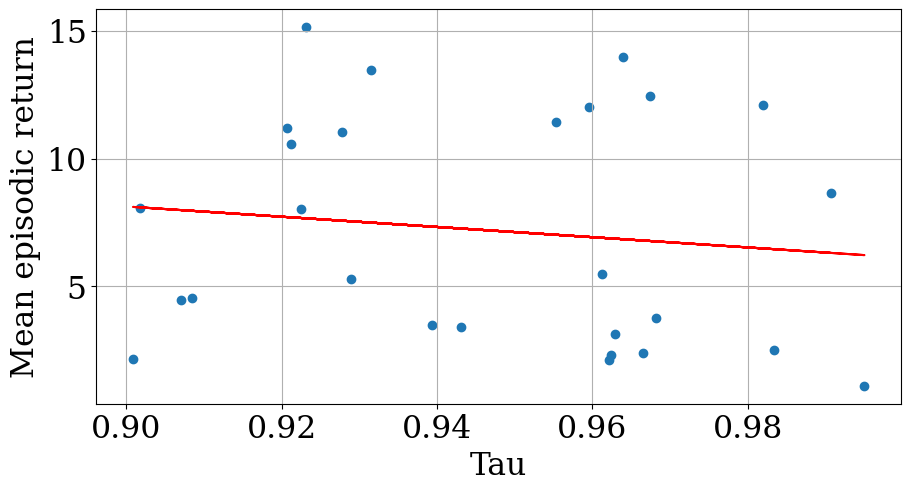

Learning rate vs. final episodic return
r=-0.55, p=0.0031


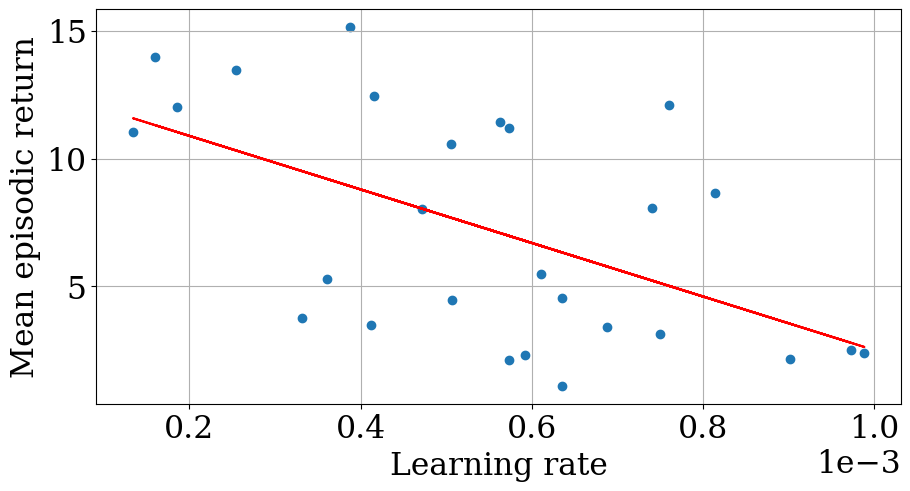

Target network frequency vs. final episodic return
r=0.52, p=0.0055


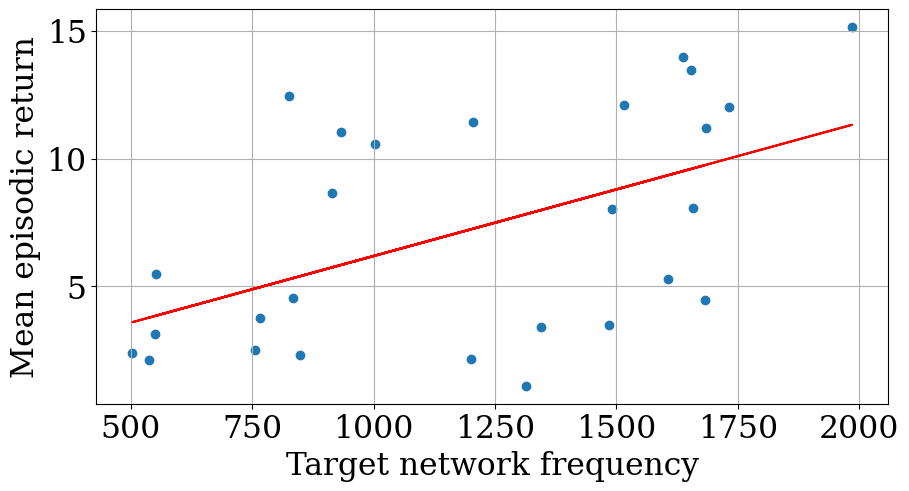

Batch size vs. final episodic return
r=0.16, p=0.4378


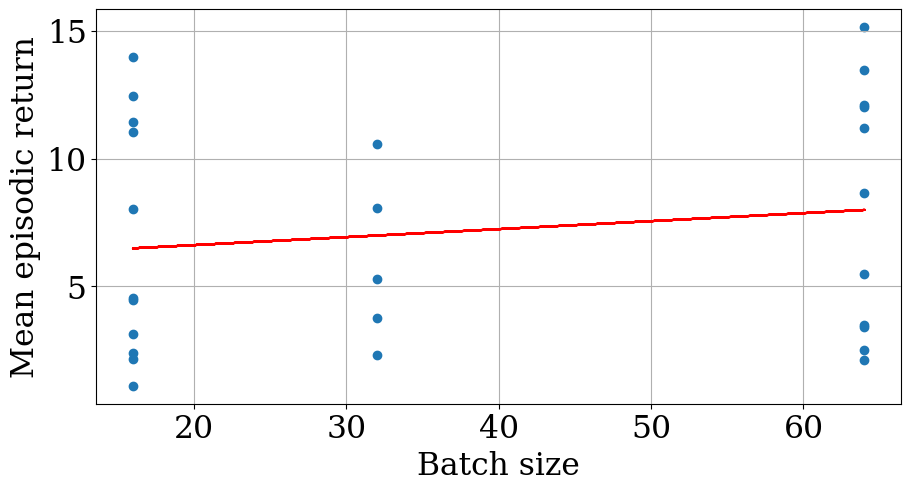

Train frequency vs. final episodic return
r=-0.16, p=0.4130


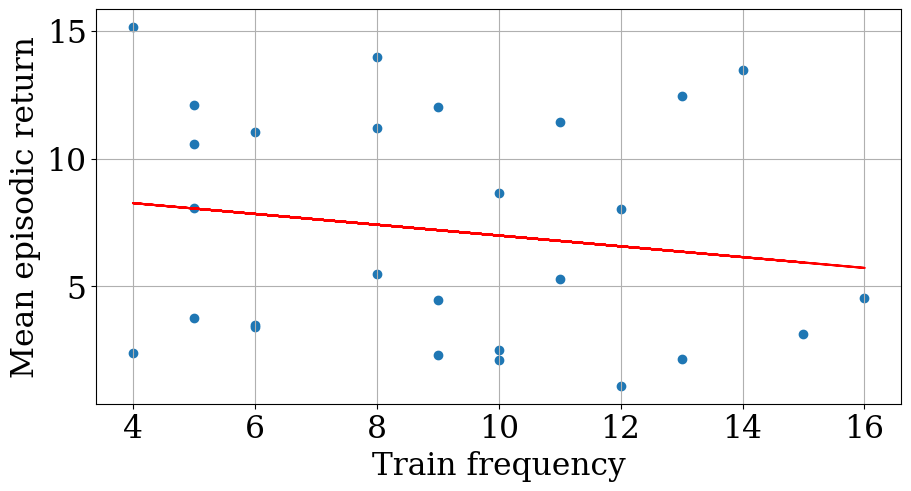

Buffer size vs. final episodic return
r=0.18, p=0.3629


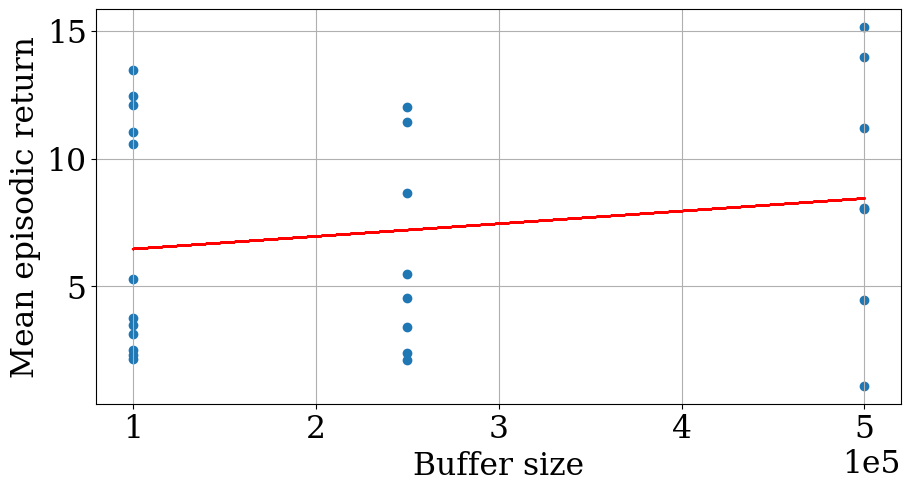

End eps vs. final episodic return
r=-0.00, p=0.9836


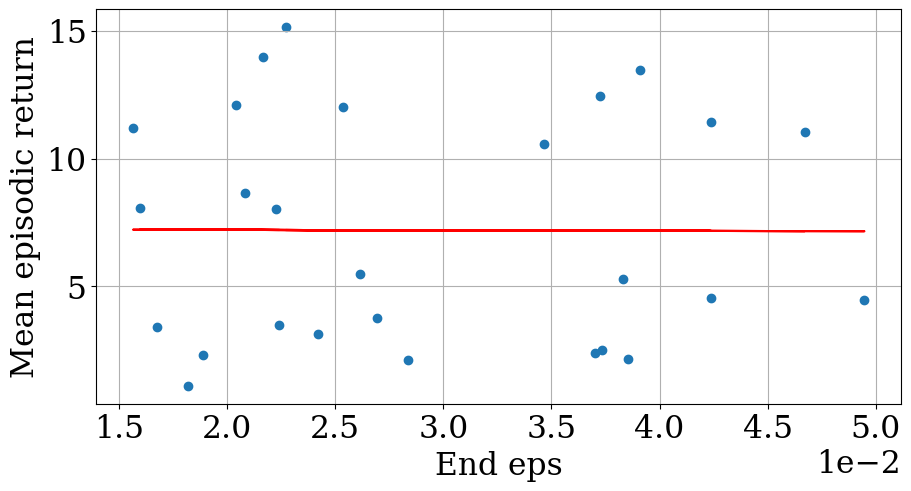

Duration eps vs. final episodic return
r=-0.05, p=0.8140


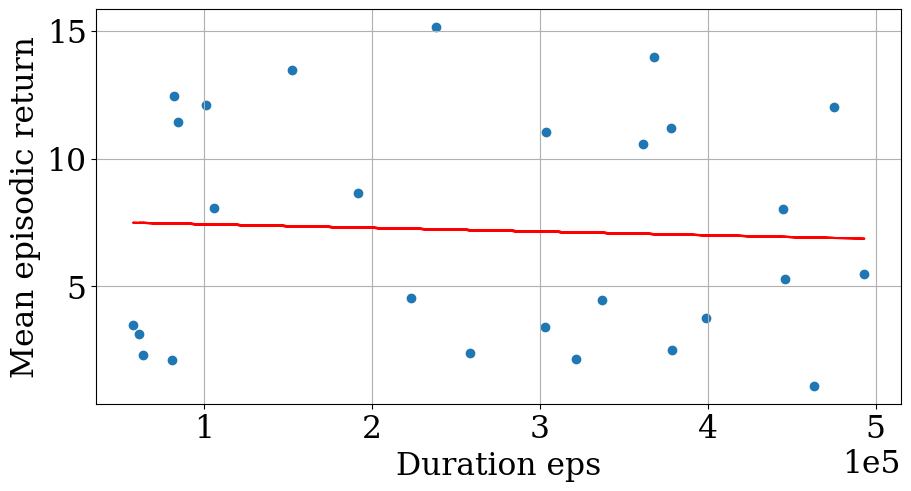

Frame skip vs. final episodic return
r=0.51, p=0.0065


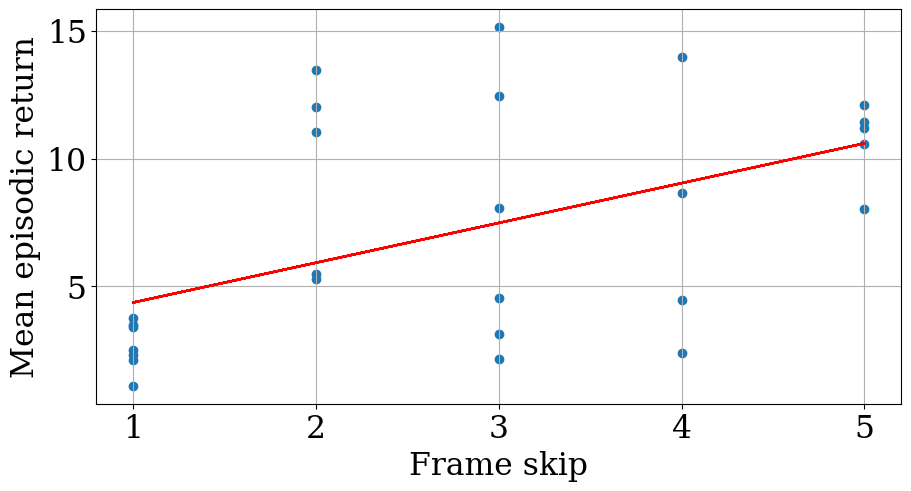

Seed vs. final episodic return
r=0.39, p=0.0453


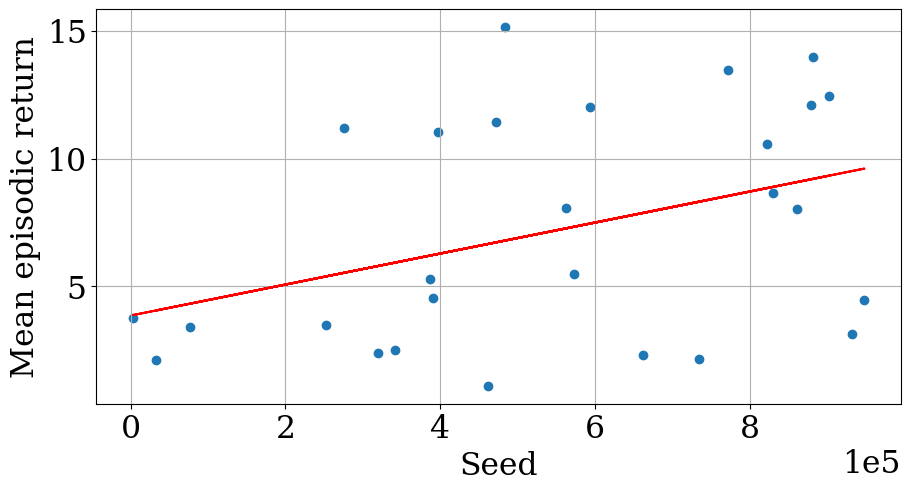

In [3]:
data = pd.read_csv('runs/results_summary.csv')
data.columns = data.columns.str.replace('_', ' ')
target = 'Mean episodic return'
data.rename(columns={'final episodic return': target}, inplace=True)
data.rename(columns={'gamma': 'discount factor'}, inplace=True)
# set first character to uppercase
data.columns = [col[0].upper() + col[1:] for col in data.columns]

for feature in data.columns:
    if feature == target or len(data[feature].unique()) == 1:
        continue
    
    # Calculate the best fit line
    m, b = np.polyfit(data[feature], data[target], 1)
    
    # Calculate the Pearson correlation coefficient and p-value
    r, p = pearsonr(data[feature], data[target])
    
    plt.figure(figsize=set_size_and_get_figsize(2))
    plt.plot(data[feature], m*data[feature] + b, color='red')
    plt.scatter(data[feature], data[target])#, s=100)
    plt.xlabel(feature)
    plt.ylabel(target)
    
    unique_values = np.sort(data[feature].unique())
    min_diff = np.min(np.diff(unique_values))
    max_diff = np.max(np.diff(unique_values))
    if min_diff < 0.0001 or max_diff > 1000:
        plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

    # Include r and p values in the plot
    # plt.title(f'{feature} vs. final episodic return\nr={r:.2f}, p={p:.4f}')
    print(f'{feature} vs. final episodic return\nr={r:.2f}, p={p:.4f}')
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f'figures/hyperparameters/{target} vs {feature}.png')
    plt.show()

In [4]:
data.sort_values(target, ascending=False).head(5)

,Discount factor,Tau,Learning rate,Target network frequency,Batch size,Train frequency,Total timesteps,Learning starts,Buffer size,Start eps,End eps,Duration eps,Frame skip,Seed,Mean episodic return
3,0.953351,0.923071,0.000388,1985,64,4,10000000,1000,500000,1.0,0.022712,238268,3,483715,15.135354
21,0.937451,0.963949,0.000160,1637,16,8,10000000,1000,500000,1.0,0.021684,368112,4,882200,13.979967
13,0.933134,0.931518,0.000255,1653,64,14,10000000,1000,100000,1.0,0.039084,152641,2,771564,13.486863
1,0.967044,0.967458,0.000416,825,16,13,10000000,1000,100000,1.0,0.037261,82152,3,902019,12.444031
17,0.929289,0.981935,0.000761,1515,64,5,10000000,1000,100000,1.0,0.020423,100988,5,879614,12.096341
